Loading datasets
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Book

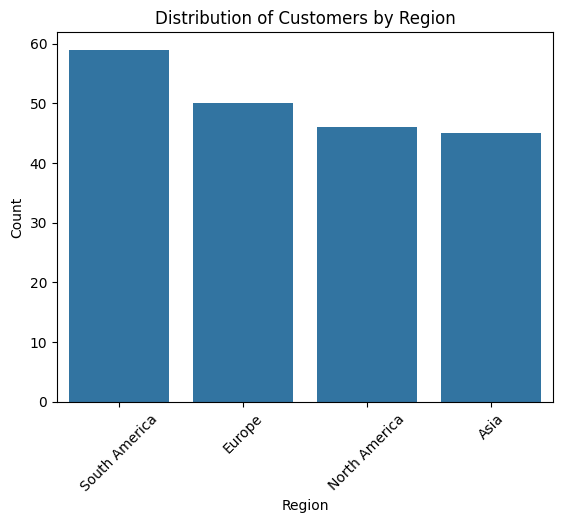


Analyzing monthly sales
TransactionDate
2023-12-01     3769.52
2024-01-01    66376.39
2024-02-01    51459.27
2024-03-01    47828.73
2024-04-01    57519.06
2024-05-01    64527.74
2024-06-01    48771.18
2024-07-01    71366.39
2024-08-01    63436.74
2024-09-01    70603.75
2024-10-01    47063.22
2024-11-01    38224.37
2024-12-01    59049.20
Freq: MS, Name: TotalValue, dtype: float64


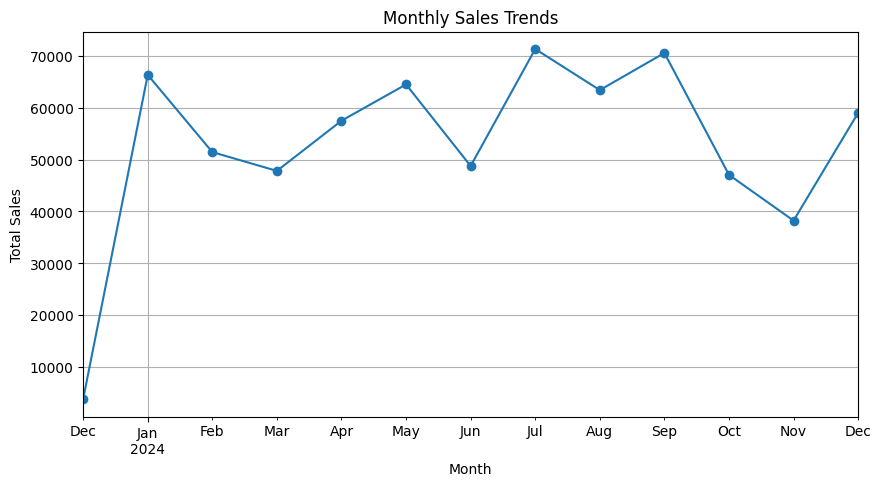


top 10 products 
ProductName
ActiveWear Smartwatch      39096.97
SoundWave Headphones       25211.64
SoundWave Novel            24507.90
ActiveWear Jacket          22712.56
ActiveWear Rug             22314.43
TechPro Headphones         19513.80
BookWorld Cookbook         19221.99
BookWorld Sweater          18743.79
TechPro Textbook           18267.96
ActiveWear Cookware Set    18083.73
Name: TotalValue, dtype: float64


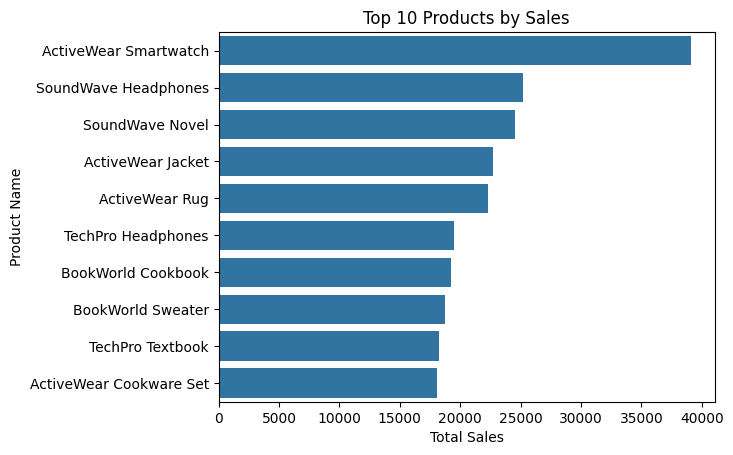

AOV
Average Order Value (AOV): $690.00

 category-wise sales
Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


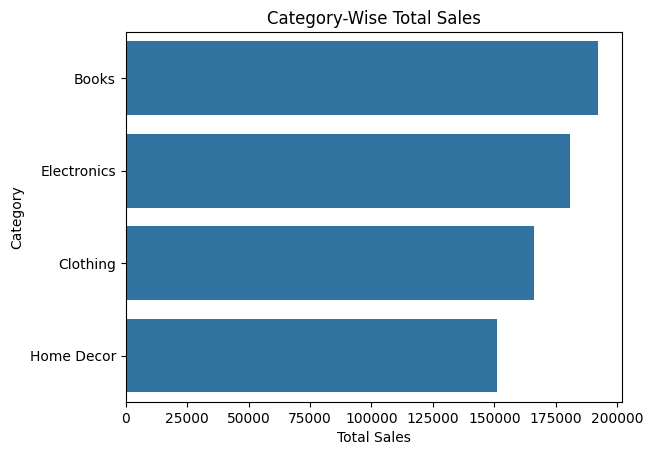

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


print("Loading datasets")
customers = pd.read_csv('/content/Customers.csv')
products = pd.read_csv('/content/Products.csv')
transactions = pd.read_csv('/content/Transactions.csv')



print(customers.head())
print(customers.info())


print(products.head())
print(products.info())


print(transactions.head())
print(transactions.info())



customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
print("Date columns converted!")


try:
    merged_data = transactions.merge(customers, on='CustomerID', how='left')
    merged_data = merged_data.merge(products, on='ProductID', how='left')
    print("merged ")
except Exception as e:
    print(f"Error during merging: {e}")
print(merged_data.head())


print("\nAnalyzing")
region_counts = customers['Region'].value_counts()
print(region_counts)
sns.barplot(x=region_counts.index, y=region_counts.values)
plt.title('Distribution of Customers by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


print("\nAnalyzing monthly sales")
try:
    transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')
    monthly_sales = merged_data.groupby(merged_data['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
    monthly_sales.index = monthly_sales.index.to_timestamp()  # Convert PeriodIndex to datetime
    print(monthly_sales)
    monthly_sales.plot(kind='line', marker='o', title='Monthly Sales Trends', figsize=(10, 5))
    plt.xlabel('Month')
    plt.ylabel('Total Sales')
    plt.grid()
    plt.show()
except Exception as e:
    print(f"Error during monthly sales analysis: {e}")


print("\ntop 10 products ")
top_products = merged_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10)
print(top_products)
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 10 Products by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.show()

# Step 8: Average Order Value (AOV)
print("AOV")
try:
    aov = merged_data['TotalValue'].mean()
    print(f"Average Order Value (AOV): ${aov:.2f}")
except Exception as e:
    print(f"Error during AOV calculation: {e}")


print("\n category-wise sales")
try:
    category_sales = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
    print(category_sales)
    sns.barplot(x=category_sales.values, y=category_sales.index)
    plt.title('Category-Wise Total Sales')
    plt.xlabel('Total Sales')
    plt.ylabel('Category')
    plt.show()
except Exception as e:
    print(f"Error during category analysis: {e}")

